In [1]:
import numpy as np
from biom.table import Table
from biom import load_table
import pandas as pd


In [2]:
t = load_table("/Volumes/TBHD/Valencia/Microbiome_Analysis/Nephele_cloud_play_project/outputs/for_analyze_with_microbiomedb.biom")
# print(t)
t.ids(axis='observation')

array(['TAX1', 'TAX4', 'TAX7', ..., 'TAX10235', 'TAX10238', 'TAX10239'],
      dtype='<U8')

In [38]:
phylum_idx = 6
collapse_f = lambda id_, md: '; '.join(md['Taxonomy'][6:phylum_idx + 1])
collapsed = t.collapse(collapse_f, axis='observation')

df = collapsed.to_dataframe()
# display(df)

col1 = pd.DataFrame(df.iloc[:, :])
display(col1)

col1 = col1.sparse.to_dense()

,AAA00108,AAA00405,AAA00507,AAA00607,AAA00806,AAA00910
Korarchaeum_cryptofilum,2.0,5.0,4.0,0.0,3.0,0.0
Prometheoarchaeum_syntrophicum,70.0,11.0,56.0,8.0,47.0,30.0
Mancarchaeum_acidiphilum,0.0,4.0,1.0,0.0,1.0,0.0
Micrarchaeum_sp.,0.0,2.0,3.0,0.0,1.0,0.0
Micrarchaeota_sp,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
Gordonia_virus_Yvonnetastic,0.0,0.0,1.0,0.0,1.0,0.0
Siphoviridae_sp,8.0,2.0,23.0,13.0,7.0,8.0
Caudovirales_sp,0.0,0.0,0.0,0.0,0.0,20.0
Wuhan_heteroptera_virus_3,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# pct = col1.div(col1.sum(axis=0), axis=0)
# col1["AAA00108_pct"] = col1["AAA00108"] / col1["AAA00108"].sum()
# pct = pct.where(pct >= 0.10).dropna()
# display(pct.where(pct >= 0.001).dropna())
# col1_largest = pct.nlargest(10, 'AAA00108')
# display(col1_largest)

,Anaerobutyricum_hallii,Anaerostipes_hadrus,Blautia_obeum,Blautia_SC05B48,Blautia_sp,Coprococcus_catus,Coprococcus_comes,Faecalicatena_Marseille-Q4148,Ruminococcus_gnavus,Ruminococcus_torques,Roseburia_intestinalis,Lachnospiraceae_sp,Faecalibacterium_prausnitzii,Clostridioides_difficile,Eubacteriales_sp,Firmicutes_sp,Bacteria_sp,Unclassified_sp
AAA00108,0.034341,0.058736,0.009922,0.008623,0.003147,0.006042,0.014118,0.005151,0.049764,0.004510,0.008639,0.017942,0.005039,0.003230,0.008663,0.007954,0.006093,0.617658
AAA00405,0.023234,0.053754,0.008978,0.048006,0.002680,0.003356,0.027503,0.002925,0.011527,0.028215,0.006879,0.017050,0.003315,0.003756,0.010623,0.007959,0.004902,0.502641
AAA00507,0.003494,0.008690,0.003957,0.003149,0.001188,0.001063,0.002224,0.001920,0.008874,0.002057,0.001230,0.007619,0.006990,0.002812,0.005669,0.004622,0.006916,0.676876
AAA00607,0.041654,0.023401,0.006499,0.048230,0.001609,0.002920,0.030061,0.001364,0.004879,0.002387,0.004183,0.013254,0.007807,0.001889,0.006256,0.005021,0.003405,0.375497
AAA00806,0.039710,0.001171,0.007411,0.008612,0.002439,0.002880,0.004335,0.001448,0.005362,0.003099,0.007203,0.012416,0.022877,0.001586,0.005024,0.004762,0.003918,0.601230
AAA00910,0.018905,0.059185,0.008836,0.023817,0.002225,0.005750,0.008667,0.001305,0.001804,0.010867,0.006279,0.012127,0.029538,0.001199,0.007528,0.007121,0.005142,0.628844


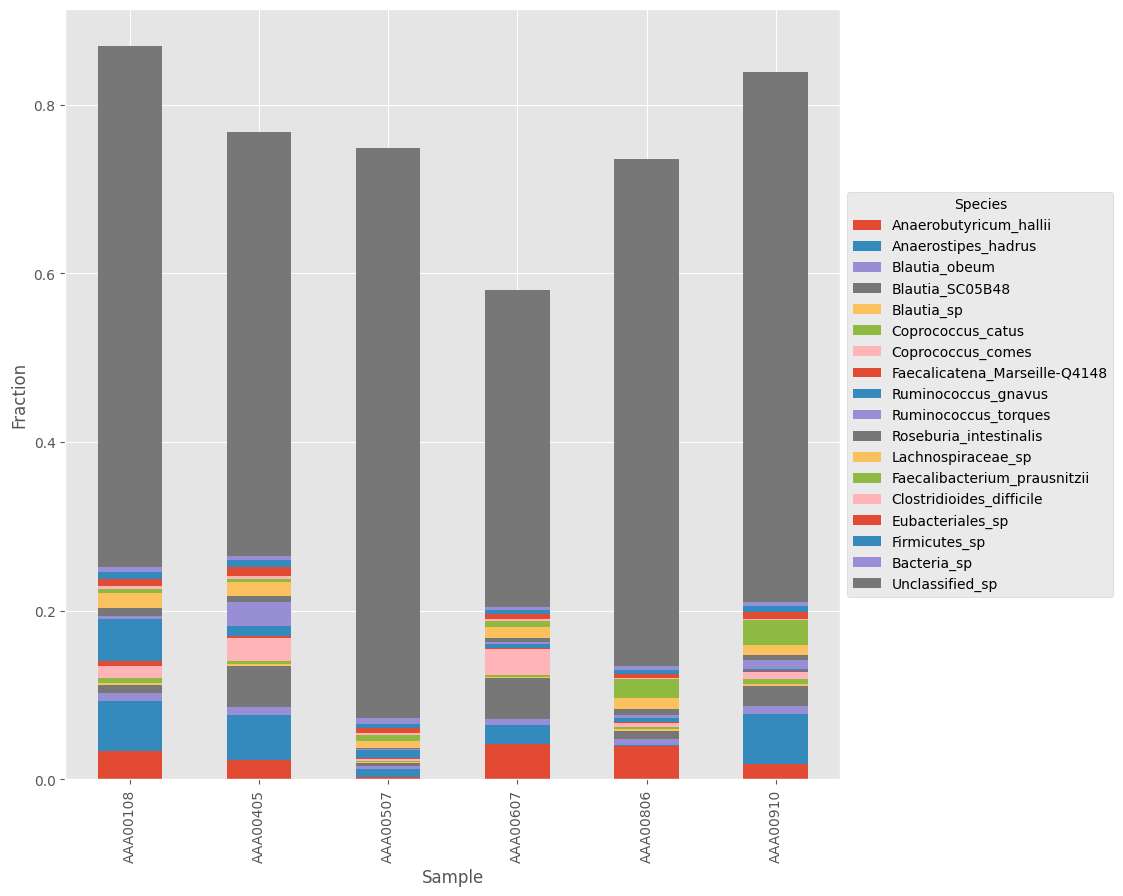

In [40]:
pct = col1.apply(lambda x: x / x.sum(), axis=0)
pct = pct.where(pct >= 0.001).dropna()
display(pct.T)

import matplotlib
matplotlib.style.use('ggplot') 
pct.T.plot.bar(stacked=True, figsize=(10, 10), ylabel="Fraction", xlabel="Sample").legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Species")